In [ ]:
import pandas as pd

df = pd.read_csv('Customer_Segmentation_py.csv')

# View the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())


         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  26/11/2013   26  November  2013            19     Youth (<25)   
1  26/11/2015   26  November  2015            19     Youth (<25)   
2  23/03/2014   23     March  2014            49  Adults (35-64)   
3  23/03/2016   23     March  2016            49  Adults (35-64)   
4  15/05/2014   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if necessary
df.drop_duplicates(inplace=True)

# Describe the numerical features
print(df.describe())


Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             1
dtype: int64
                Day          Year  Customer_Age  Order_Quantity     Unit_Cost  \
count  23405.000000  23405.000000  23405.000000    23405.000000  23405.000000   
mean      15.524375   2014.579919     35.908994       14.915744      5.657894   
std        8.843986      1.115064     10.892700        8.729322     10.119639   
min        1.000000   2013.000000     17.000000        1.000000      2.000000   
25%        8.000000   2014.000000     28.000000        7.000000      2.000000   
50%       15.000000   2014.000000     35.000000       15.000000      3.000000   
75%       23.000000   20

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Customer_Segmentation_py.csv')

# Ensure 'Date' is in datetime format (merge 'Day', 'Month', 'Year' into a proper datetime column if necessary)
df['InvoiceDate'] = pd.to_datetime(df[['Day', 'Month', 'Year']].astype(str).agg('-'.join, axis=1), format='%d-%B-%Y')

# Reference date for calculating Recency
reference_date = df['InvoiceDate'].max()

# Calculate RFM metrics
rfm = df.groupby('Customer_Age').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Order_Quantity': 'sum',                                  # Frequency (or total purchases/orders made)
    'Revenue': 'sum'                                          # Monetary (total revenue generated by the customer)
}).reset_index()

# Rename columns for better clarity
rfm.columns = ['Customer_Age', 'Recency', 'Frequency', 'Monetary']

# Display the resulting RFM table
print(rfm.head())


   Customer_Age  Recency  Frequency  Monetary
0            17        0      16038    726878
1            18        2      20918   1303649
2            19        0      23609   1407281
3            20        2      24929    898471
4            21        0      29043   1238272


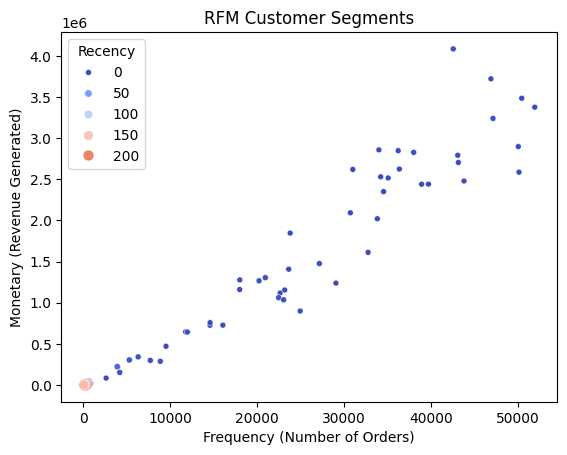

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rfm, x='Frequency', y='Monetary', size='Recency', hue='Recency', palette='coolwarm')
plt.title('RFM Customer Segments')
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Monetary (Revenue Generated)')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize RFM metrics
rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

print(rfm.head())


   Customer_Age   Recency  Frequency  Monetary
0            17  0.000000   0.308376  0.177893
1            18  0.008032   0.402448  0.319098
2            19  0.000000   0.454323  0.344469
3            20  0.008032   0.479769  0.219902
4            21  0.000000   0.559075  0.303092


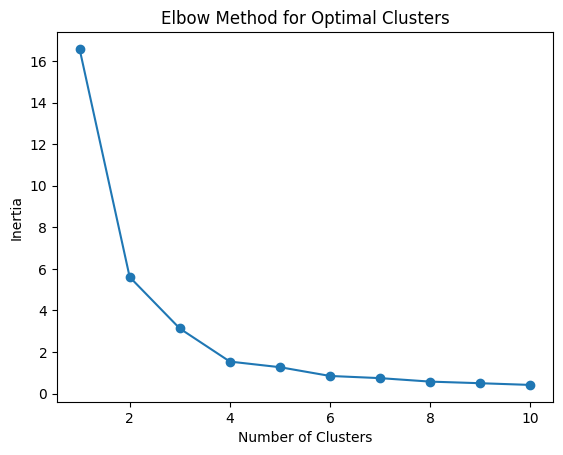

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm[['Recency', 'Frequency', 'Monetary']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# Display cluster assignments
print(rfm.head())


   Customer_Age   Recency  Frequency  Monetary  Cluster
0            17  0.000000   0.308376  0.177893        2
1            18  0.008032   0.402448  0.319098        2
2            19  0.000000   0.454323  0.344469        2
3            20  0.008032   0.479769  0.219902        2
4            21  0.000000   0.559075  0.303092        2


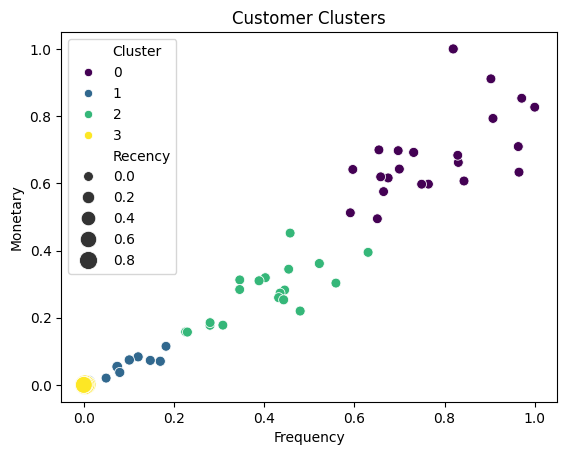

In [ ]:
import seaborn as sns

# Scatter plot for Frequency vs Monetary colored by Cluster
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', size='Recency', sizes=(50, 200))
plt.title('Customer Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()
plt.show()


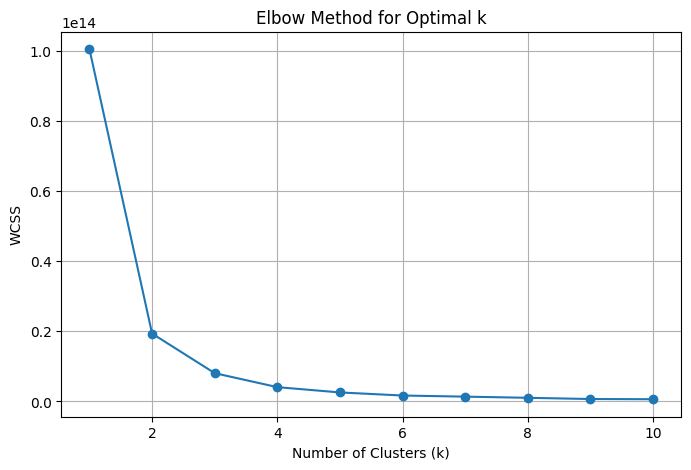

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):  # Test clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm[['Recency', 'Frequency', 'Monetary']])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming k=4 from the Elbow Method
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm[['Recency', 'Frequency', 'Monetary']])
labels = kmeans.labels_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(rfm[['Recency', 'Frequency', 'Monetary']], labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.6979833825536768


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(rfm[['Recency', 'Frequency', 'Monetary']], labels)
print(f'Davies-Bouldin Index: {db_score}')


Davies-Bouldin Index: 0.40284456187406137


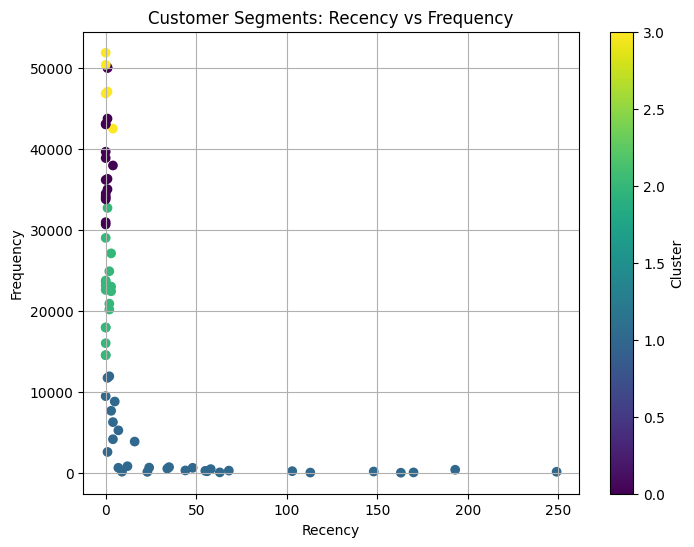

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'labels' contains the cluster assignments from KMeans (see previous code snippets)
rfm['Cluster_Label'] = labels  # Add cluster labels to the DataFrame

# Plot clusters using Recency vs Frequency (or any two features)
plt.figure(figsize=(8,6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster_Label'], cmap='viridis')
plt.title('Customer Segments: Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.savefig('customer_segments.png', dpi=300)
plt.show()


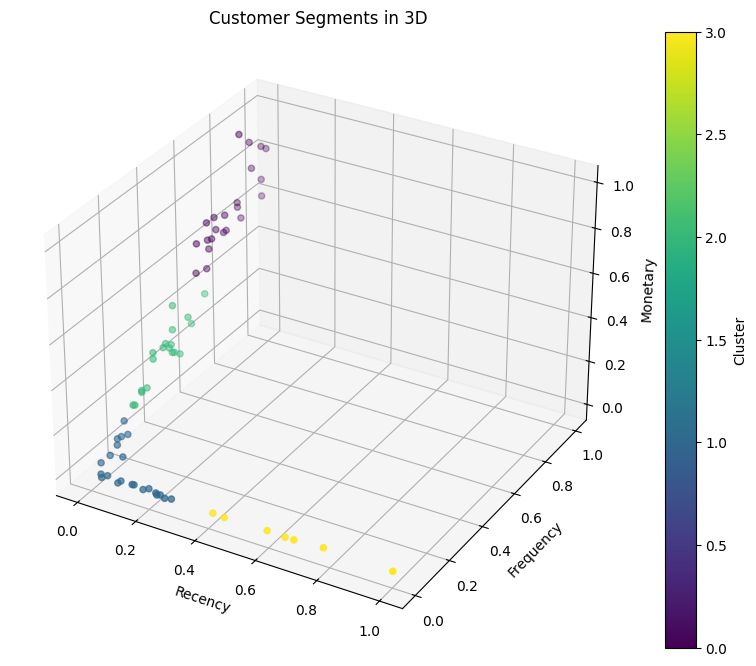

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D plot for Recency, Frequency, and Monetary
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster_Label'], cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Customer Segments in 3D')
plt.colorbar(scatter, label='Cluster')
plt.show()


<ipython-input-39-254b69cde612>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Cluster_Label', palette='Set2')


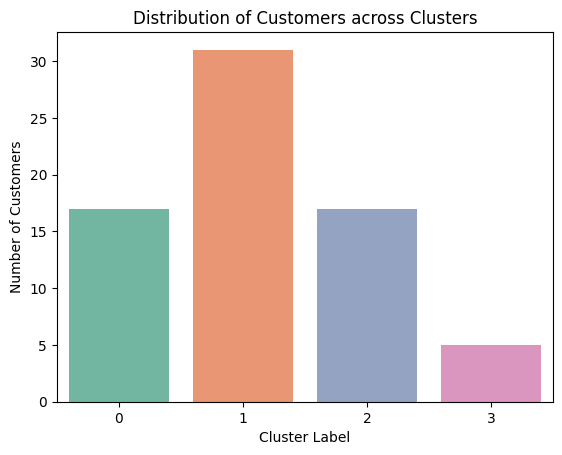

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=rfm, x='Cluster_Label', palette='Set2')
plt.title('Distribution of Customers across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.savefig('cluster_distribution.png', dpi=300)
plt.show()


<ipython-input-26-e2c1352d29be>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Cluster_Label', y='Customer_Age', palette='Set2')


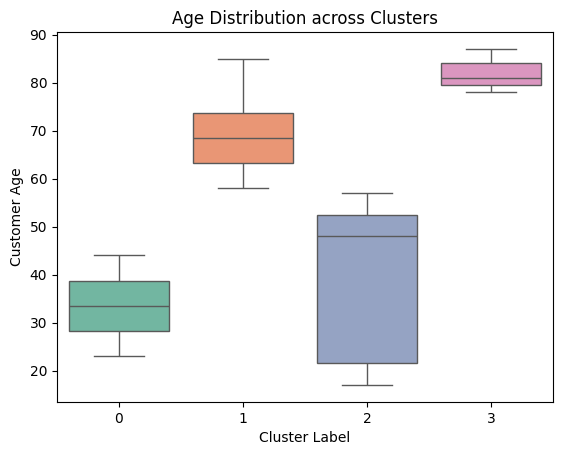

In [ ]:
sns.boxplot(data=rfm, x='Cluster_Label', y='Customer_Age', palette='Set2')
plt.title('Age Distribution across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Customer Age')
plt.show()


<ipython-input-35-58473c0017cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Cluster_Label', y='Monetary', palette='Set2')


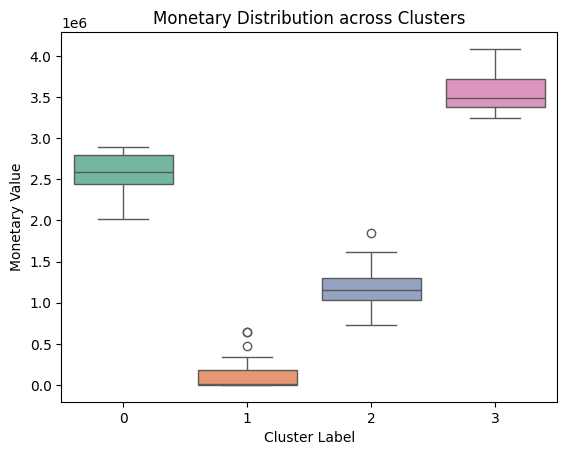

In [ ]:
sns.boxplot(data=rfm, x='Cluster_Label', y='Monetary', palette='Set2')
plt.title('Monetary Distribution across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Monetary Value')
plt.savefig('monetary_distribution.png', dpi=300)
plt.show()


<ipython-input-26-b48c2a368b77>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_Label', data=rfm, palette='Set3')


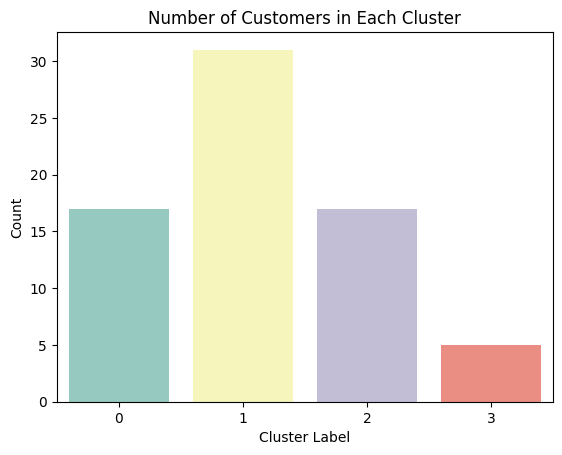

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster_Label', data=rfm, palette='Set3')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()


<ipython-input-34-1d56cf2e8cbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Label', y='Monetary', data=rfm, palette='Set2')


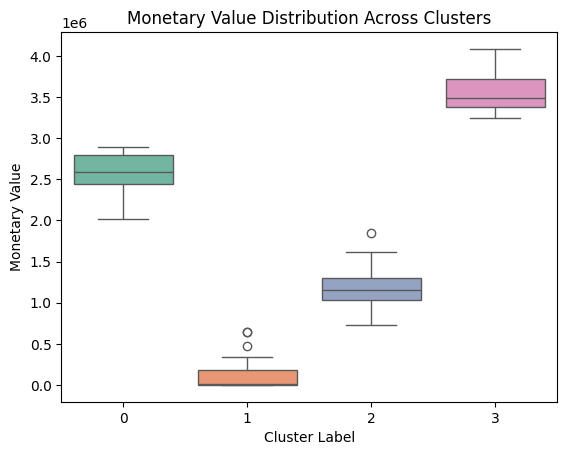

<ipython-input-34-1d56cf2e8cbd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Label', y='Frequency', data=rfm, palette='Set3')


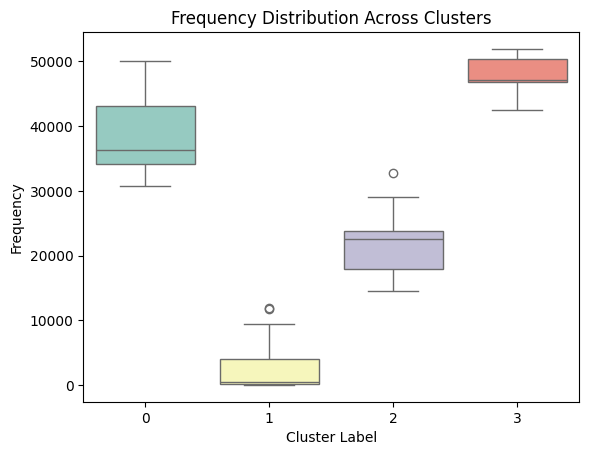

<ipython-input-34-1d56cf2e8cbd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Label', y='Recency', data=rfm, palette='Set1')


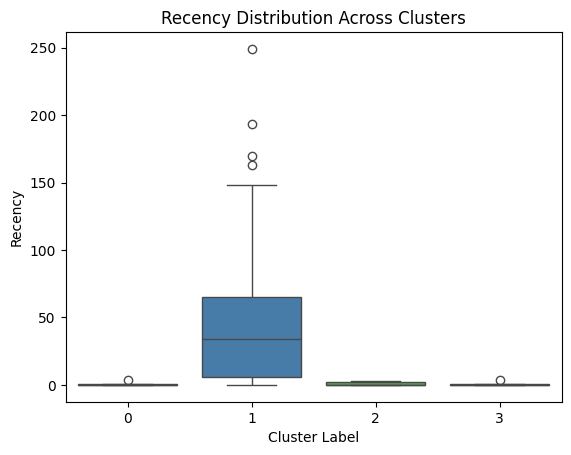

In [ ]:
# Monetary value distribution across clusters
sns.boxplot(x='Cluster_Label', y='Monetary', data=rfm, palette='Set2')
plt.title('Monetary Value Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Monetary Value')
plt.show()

# Frequency distribution across clusters
sns.boxplot(x='Cluster_Label', y='Frequency', data=rfm, palette='Set3')
plt.title('Frequency Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

# Recency distribution across clusters
sns.boxplot(x='Cluster_Label', y='Recency', data=rfm, palette='Set1')
plt.title('Recency Distribution Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Recency')
plt.show()


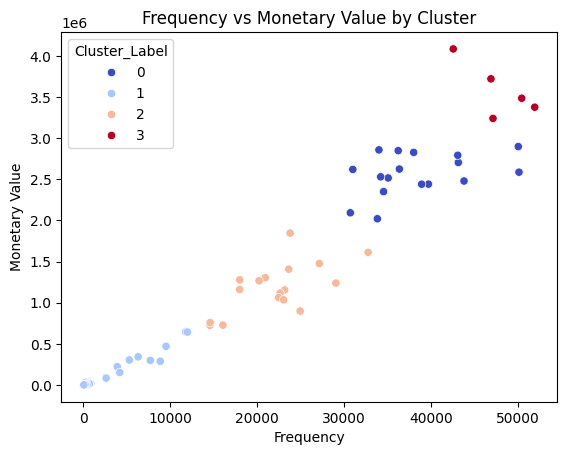

In [ ]:
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster_Label', palette='coolwarm')
plt.title('Frequency vs Monetary Value by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.show()


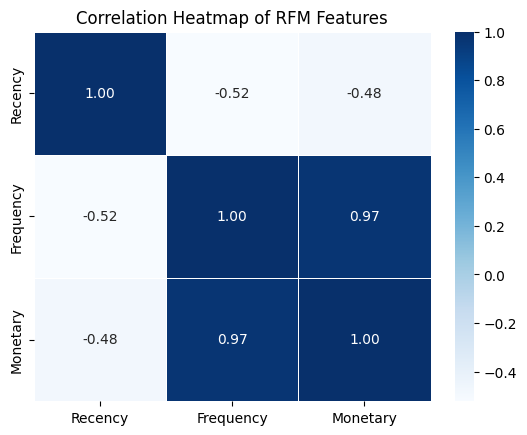

In [ ]:
import numpy as np

corr = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap of RFM Features')
plt.savefig('rfm_heatmap.png' , dpi=300)
plt.show()


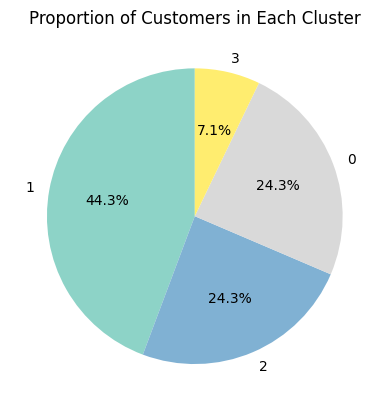

In [ ]:
rfm['Cluster_Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Proportion of Customers in Each Cluster')
plt.ylabel('')  # Hides the y-axis label
plt.savefig('cluster_pie_chart.png', dpi=300)
plt.show()
